# 목차
###Step1.인물사진 처리 :Shallow Forcus
- 1.사진 준비
- 2.세그멘테이션으로 사람 분리
- 3.시맨틱 세그멘테이션
- 4.배경 흐리게 하기
- 5.흐린 배경과 원본 영상 합성

###Step2. 사진 문제점 찾기

###Step3. 해결방법 제안 하기 

회고

## 0. 라이브러리 버전 확인

In [ ]:
#라이브러리 version 확인

!pip install numpy==1.21
!pip install tensorflow-gpu==2.4.0 keras==2.4.0
!pip install pixellib
!pip install Pillow==8.3.2

# 런타임 삭제 해제 하면 초기화 되니까 하지말것 !

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_gpu-2.4.0-cp37-cp37m-manylinux2010_x86_64.whl (394.7 MB)
  Using cached Keras-2.4.0-py2.py3-none-any.whl (170 kB)
     |████████████████████████████████| 132 kB 16.0 MB/s 
     |████████████████████████████████| 3.8 MB 66.0 MB/s 
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     |████████████████████████████████| 2.9 MB 45.4 MB/s 
     |████████████████████████████████| 14.8 MB 50.4 MB/s 
     |████████████████████████████████| 462 kB 78.4 MB/s 
     |████████████████████████████████| 511.7 MB 6.5 kB/s 
     |████████████████████████████████| 511.7 MB 4.7 kB/s 
     |████████████████████████████████| 518.1 MB 19 kB/s 
     |████████████████████████████████| 587.9 MB 11 kB/s 
     |████████████████████████████████| 668.6 MB 6.7 kB/s 
     |████████████████████████████████| 668.6 MB 1

In [ ]:
!pip install importlib-metadata
from importlib_metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
4.6.0
0.7.1


# Step1.인물사진 처리 :Shallow Forcus

##0. 라이브러리

In [ ]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


In [ ]:
import numpy, tensorflow, keras, pixellib, PIL 

print(numpy.__version__)
print(PIL.__version__)
print(tensorflow.__version__)
print(keras.__version__)

1.19.5
8.3.2
2.4.0
2.4.0


## 1.사진 준비

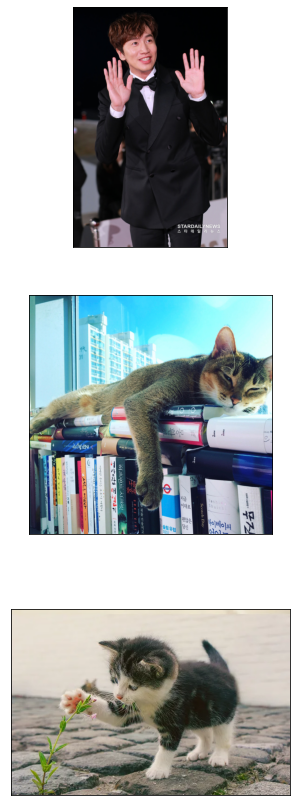

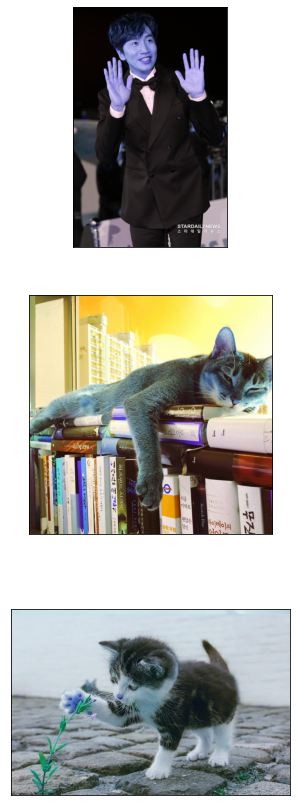

In [60]:
img_path1 = '/content/drive/MyDrive/Aiffel_data/Exp9_CV3/project/lks.jpeg'  
img_orig1 = cv2.imread(img_path1) 


img_path2 = '/content/drive/MyDrive/Aiffel_data/Exp9_CV3/project/cat_1.jpeg'  
img_orig2 = cv2.imread(img_path2) 

img_path3 = '/content/drive/MyDrive/Aiffel_data/Exp9_CV3/project/cat_3.webp'  
img_orig3 = cv2.imread(img_path3) 


## subplots
# fig, axes = plt.subplots(3, figsize=(5,15))

# axes[0].imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
# axes[1].imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
# axes[2].imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))


# ## for 문
# fig, axes = plt.subplots(3, figsize=(5,15))
# img_origin = [img_orig1, img_orig2, img_orig3]

# for i in range(3):
#   axes[i].imshow(cv2.cvtColor(img_origin[i], cv2.COLOR_BGR2RGB))



## 함수1 (BGR>RGB 변환)
img_origin = [img_orig1, img_orig2, img_orig3]
img = [img_orig1]



def image_show (img_origin, color=cv2.COLOR_BGR2RGB):
  num = len(img_origin)

  fig, axes = plt.subplots(num, figsize=(5, 5*num))


  if num == 1 :
    axes.imshow(cv2.cvtColor(img_origin[0], color))
    axes.set_xticks([])
    axes.set_yticks([])


  else:
    for i in range(num):
      axes[i].imshow(cv2.cvtColor(img_origin[i], color))
      axes[i].set_xticks([])
      axes[i].set_yticks([])

image_show(img_origin)








# # 함수2
# img_origin = [img_orig1, img_orig2, img_orig3]

# def image_show (img_origin):
#   num = len(img_origin)
#   fig, axes = plt.subplots(num, figsize=(5, 5*num))

#   for i in range(num):
#     axes[i].imshow(cv2.cvtColor(img_origin[i], cv2.COLOR_BGR2RGB))

# image_show(img_origin)


# 함수3 (BGR)
def image_show_2 (img_origin):
  num = len(img_origin)

  fig, axes = plt.subplots(num, figsize=(5, 5*num))


  if num == 1 :
    axes.imshow(img_origin[0])
    axes.set_xticks([])
    axes.set_yticks([])


  else:
    for i in range(num):
      axes[i].imshow(img_origin[i])
      axes[i].set_xticks([])
      axes[i].set_yticks([])

image_show_2(img_origin)




# axes 한개일때는 


# print(img_orig1.shape)
# plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
# print(img_orig.shape)
# plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
# print(img_orig.shape)
# plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
# plt.show()

##2.세그멘테이션으로 사람 분리


## 3.시맨틱 세그멘테이션


In [35]:
# 저장할 파일 이름을 결정합니다
model_dir = '/content/drive/MyDrive/Aiffel_data/Exp9_CV3/'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/Aiffel_data/Exp9_CV3/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f1aff3609d0>)

In [36]:
# 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [37]:
# 모델에 이미지 입력
segvalues1, output1 = model.segmentAsPascalvoc(img_path1)
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

In [38]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

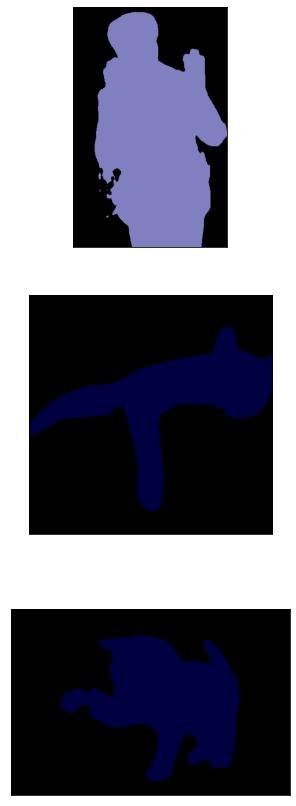

In [47]:
# plt.imshow(output1)
# plt.imshow(output2)
# plt.imshow(output3)
# plt.show()

img_output= [output1, output2, output3]
image_show_2(img_output)

In [48]:
print(segvalues1)
print(segvalues2)
print(segvalues3)

{'class_ids': array([ 0, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([0, 8]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([0, 8]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
    

In [49]:
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])
print('')
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])
print('')
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
person

background
cat

background
cat


In [50]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [51]:
# person(15) color map 

print(colormap[15])
print(colormap[8])


[192 128 128]
[64  0  0]


In [53]:
# BGR(color map) > RGB(seg_color)
seg_color = (128,128,192)
seg_color_2 = (0, 0, 64)

In [64]:
seg_map1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(1875, 1200)
(947, 960)
(400, 600)


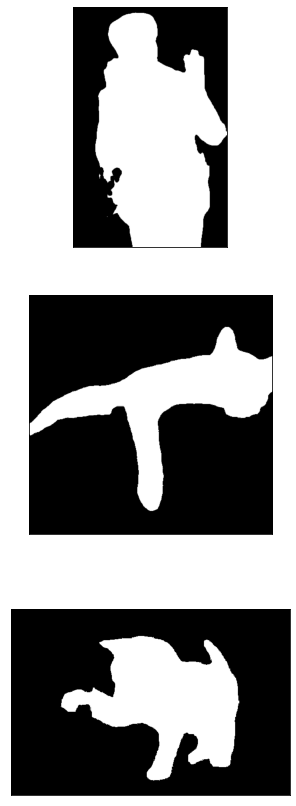

In [69]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다

seg_map1 = np.all(output1==seg_color, axis=-1)
print(seg_map1.shape)


seg_map2 = np.all(output2==seg_color_2, axis=-1)
print(seg_map2.shape)


seg_map3 = np.all(output3==seg_color_2, axis=-1)
print(seg_map3.shape)


seg_map = [seg_map1, seg_map2, seg_map3]

img_mask1 = seg_map1.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255
image_show([img_mask1, img_mask2, img_mask3])


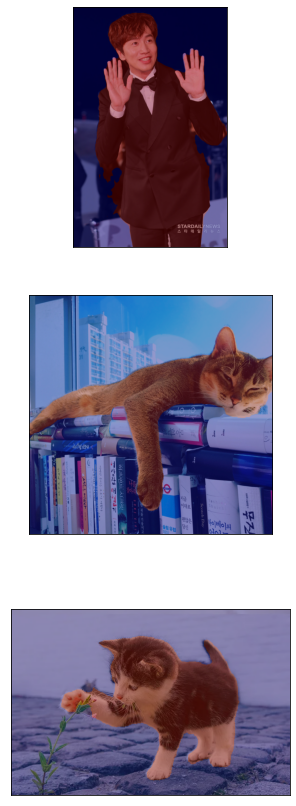

In [73]:
img_show1 = img_orig1.copy()
img_show2 = img_orig2.copy()
img_show3 = img_orig3.copy()


# # True과 False인 값을 각각 255과 0으로 바꿔줍니다
# img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show1 = cv2.addWeighted(img_show1, 0.6, color_mask1, 0.4, 0.0)
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)


# plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
# plt.show()
image_show([img_show1, img_show2, img_show3])

## 4.배경 흐리게 하기

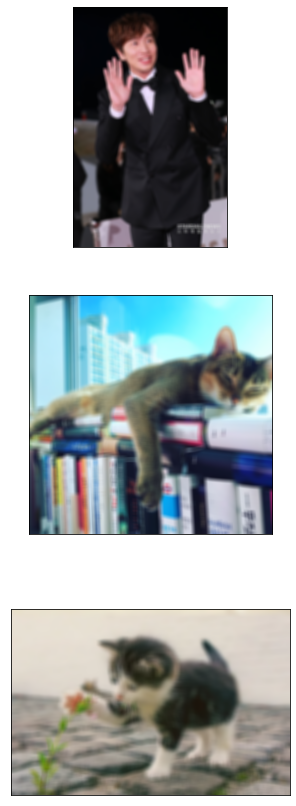

In [76]:
# 이미지 cv2.blur() 처리하기
# img_orig_blur생성


# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur1 = cv2.blur(img_orig1, (30,30))  
img_orig_blur2 = cv2.blur(img_orig2, (20,20))  
img_orig_blur3 = cv2.blur(img_orig3, (13,13))  

# plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
# plt.show()

image_show([img_orig_blur1, img_orig_blur2, img_orig_blur3])

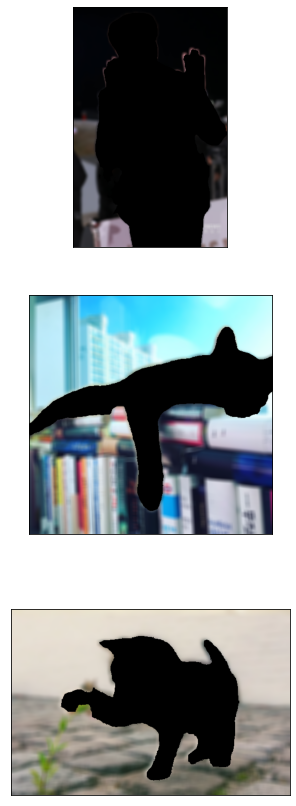

In [77]:
#img_bg_blur생성 

img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)
# plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))

img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
# plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))

img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)
# plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))


# plt.show()

image_show([img_bg_blur1, img_bg_blur2, img_bg_blur3])

## 5.흐린 배경과 원본 영상 합성

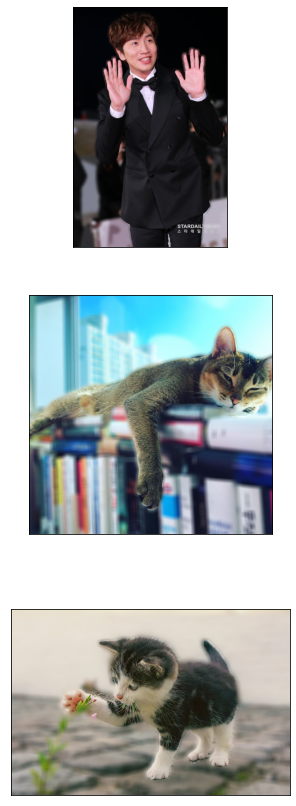

In [78]:
# img_concat

img_concat1 = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
# plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))

img_concat2 = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
img_concat3 = np.where(img_mask_color3==255, img_orig3, img_bg_blur3)

# plt.show()
image_show([img_concat1, img_concat2, img_concat3])

In [79]:
img_bg= cv2.imread("/content/drive/MyDrive/Aiffel_data/Exp9_CV3/fall.jpeg") 


In [80]:
img_orig3.shape

(400, 600, 3)

In [82]:
img_bg.shape

(432, 648, 3)

In [85]:

img_bg_rs= cv2.resize(img_bg, (600, 400))
img_bg_rs.shape

(400, 600, 3)

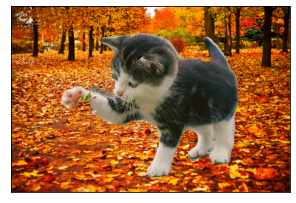

In [89]:
img_concat4 = np.where(img_mask_color3==255, img_orig3, img_bg_rs)

image_show([img_concat4])


# Step2. 사진 문제점 찾기
* 고양이 손에 풀잎이 그대로 출력 되었다. 

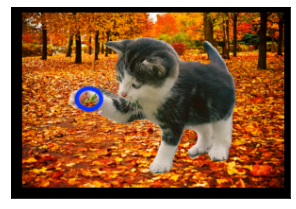

In [92]:
cat_fall = cv2.imread("/content/drive/MyDrive/Aiffel_data/Exp9_CV3/cat_fall.png")
image_show([cat_fall])

# Step3. 해결방법 제안 하기





1. **피사계 심도**를 이용한 이미지 추상화와 객체 분리

해당 논문은 피사계 심도 (DoF, Depth of field)가 포함된 사진을자동으로 추상화시켜주는 비 사실적 렌더링 (NPR, Non-photorealistic rendering) 기술을 적용을 고려하였다.
본논문에서는 DoF가 포함된 이미지 추상화에서의 1) DoF 영역 찾기, 2) 단계별 색상 추상화, 3) 단계별 라인 추출을 위해 상호-상관 필터 기반의 접근 방식을 활용한다.
하지만 고양이 손과 꽃의 피사계심도가 유사하기에 효과적인 이미지 추상화와 객체분리 적용이 힘들것 같다.

http://journal.cg-korea.org/archive/view_article?pid=jkcgs-24-5-1


2. Mask Region CNN을 이용한 중첩된 세포 분리 

( Segmentation of Overlapping Cervical Cells with Mask Region Convolutional Neural Network)

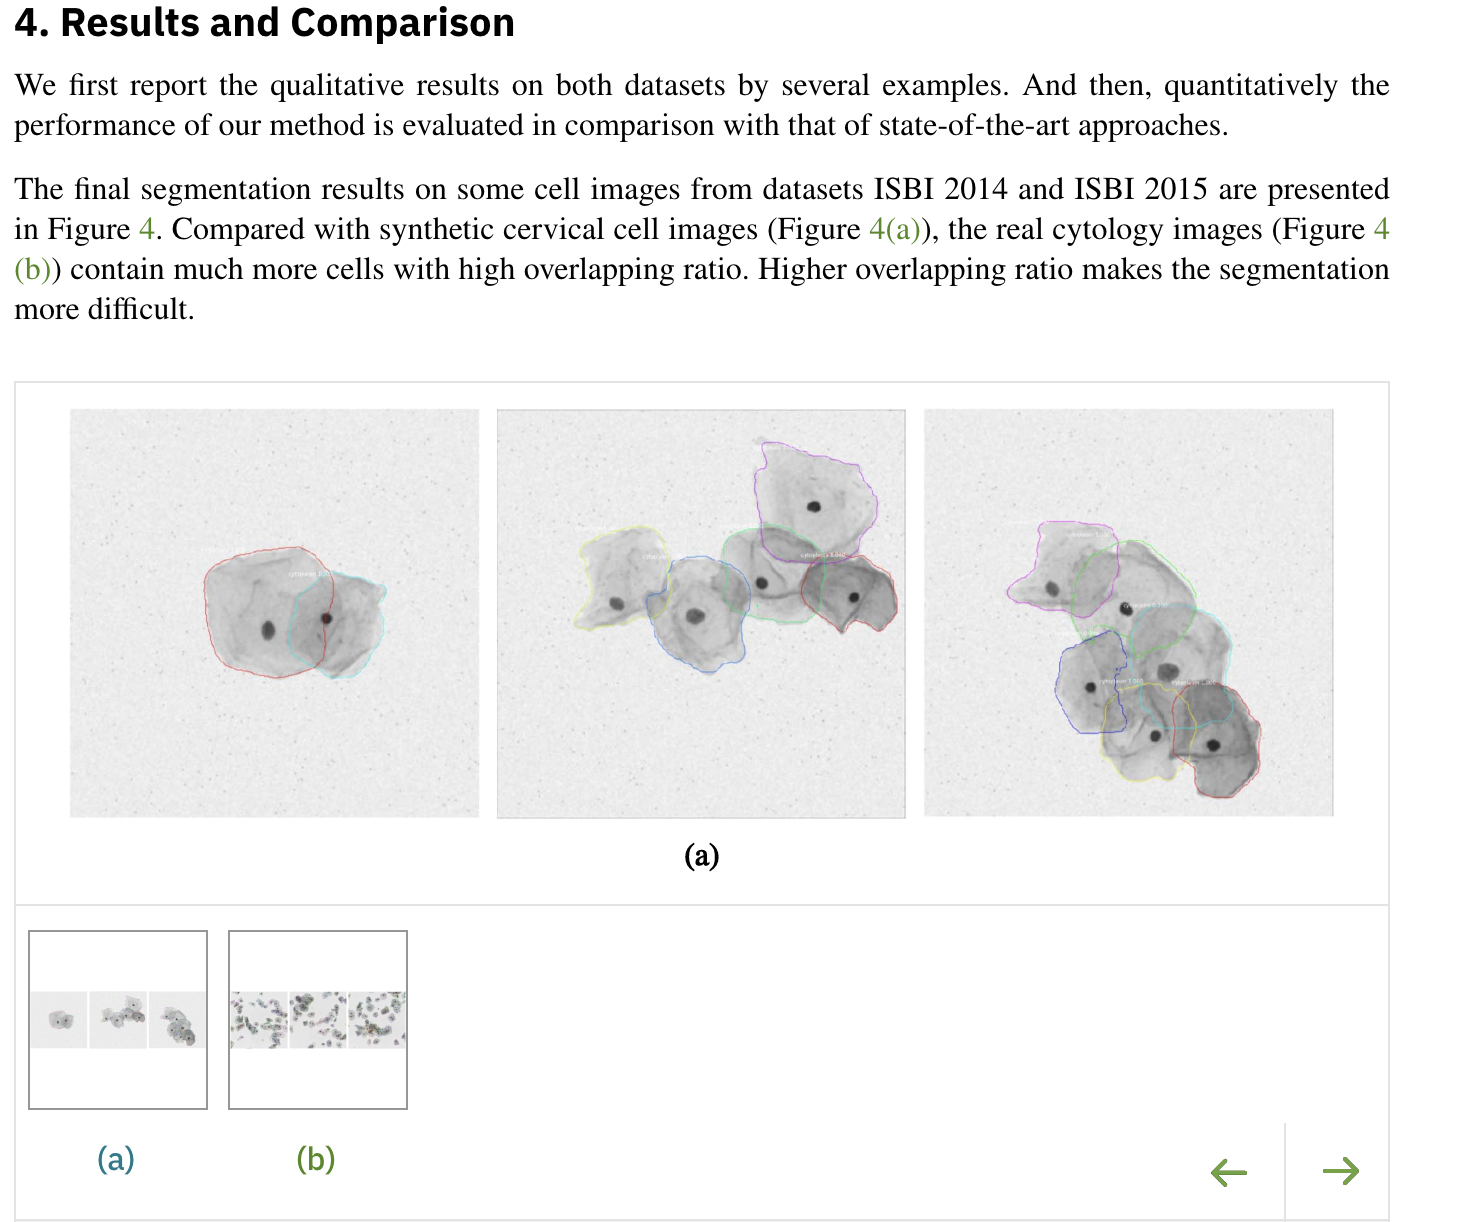


In this paper, a new method based on Mask RCNN is proposed for cytoplasm segmentation directly, without the detection of nuclei in the first place. The architecture of Mask RCNN is depicted in Figure 2. In detail, the ResNet50 is used as the backbone network, with weights pretrained on the famous dataset ImageNet. Mask RCNN has two stages.

본논문에서, 세포핵을 탐지하는 과정을 거치지 않고 바로 세포자체를 인식 하기위한 Mask RCNN 을 기반으로  한 새로운 기법을  사용하였다.
ResNet50이 backbone network을 기반으로 두가지 단계를 거쳐 중첩된 세포질의 가려진 부분까지 분리한다. 
하지만 세포질은 투명성이 높아 중첩된 객체를 정확하게 분리 할 수 있지만 이 기법을 일반 객체들에게 적용하기에는 한계가 있을 것으로 사료된다.

https://stackoverflow.com/questions/59054263/


3. **중첩 이중 레이어**를 이용한 폐색인식 인스턴스 분리 [BCNet, CVPR 2021]

(Deep Occlusion-Aware Instance Segmentation with Overlapping BiLayers [BCNet, CVPR 2021])


 Simplified illustration. Unlike previous segmentation
approaches operating on a single image layer (i.e., directly on
the input image), we decouple overlapping objects into two image layers, where the top layer deals with the occluding objects
(occluder) and the bottom layer for occludee (which is also referred to as target object in other methods as they do not explicitly
consider the occluder). 

하나의  레이어를 직접 인풋 이미지에 적용하는 세그멘테이션 접근법과 다르게, BCNet 은 중첩된 이미지를 두개의 레이어로 분리하여  상위 레이어는 가리는  객체를 하위 레이어는 가려지는 객체를 처리한다.  
본논문에서는 고양이 손에 꽃이 중첩되는 현상과 정확히 일치하는 문제점을 해결하였기에 BCNet 기법을 적용하여 해당 문제를 해결 할 수 있다. 


https://www.hindawi.com/journals/cmmm/2021/3890988/

https://github.com/lkeab/BCNet


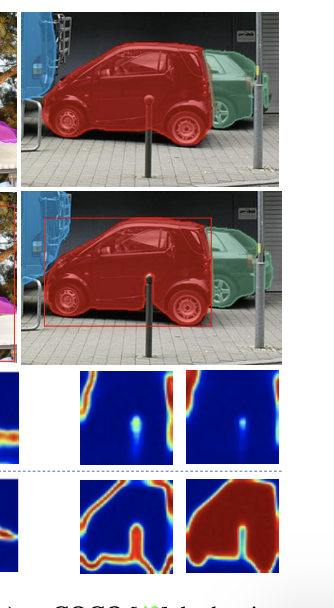

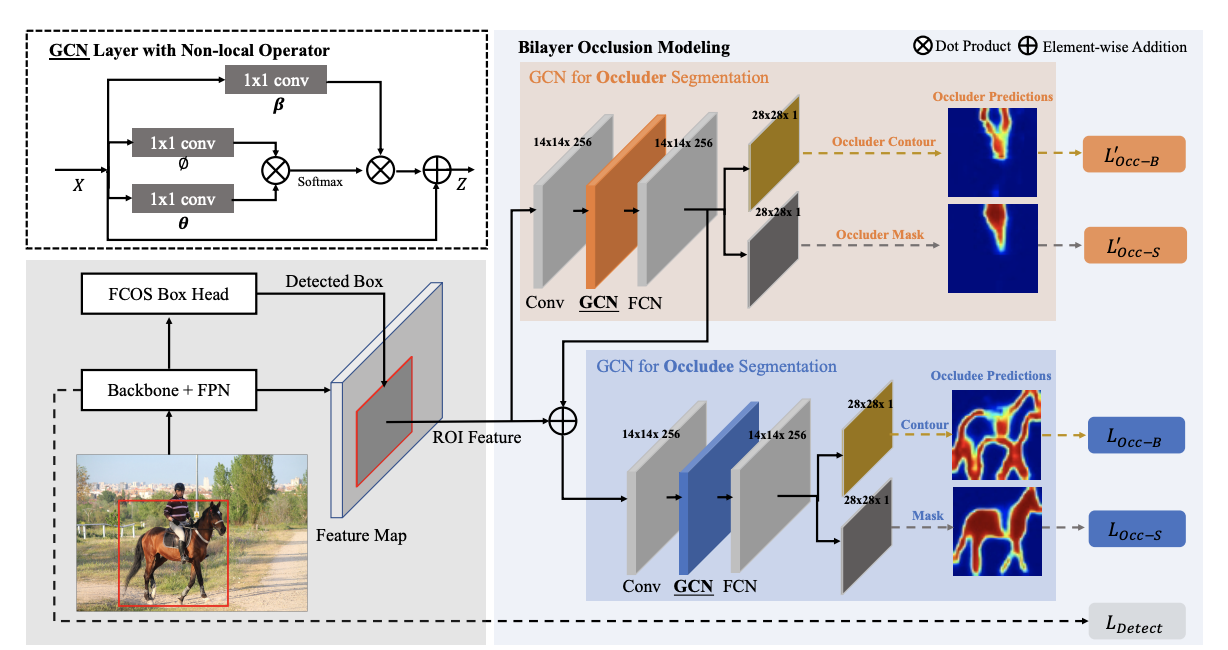

# 회고


### - 이번 프로젝트에서 **어려웠던 점**.
레이블 되어 있지 않은 중첩된 객체를 분리하기 위해 처리해야 할 방법을 고민하느라 시간이 걸렸다.

### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
*  함수를 적용하여 이미지 처리를 하였다.


### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
* 이미지 세그멘테이션 과정중에서 발생한 문제점을 해결하기 우해 여러 논문과 기법을 찾아 보고 비교해서 맞는 해결법을 찾았다.

